In [307]:
import pandas as pd
import openpyxl 
from datetime import datetime 
from scipy.stats import kurtosis
import numpy as np 
import pylab as p
import os
from pathlib import Path
from openpyxl import load_workbook

In [308]:
file_name_str = r"..\Refinitiv\Refinitiv_ESG & Financial Data (2012-2022) edited by KN (04032023).xlsx";
fin_file = pd.ExcelFile(file_name_str)
fin_file.sheet_names

['AU-404',
 'CN-934',
 'HK-349',
 'MY-331',
 'SG-92',
 'rm & rfr',
 'Description',
 'Variables',
 'Multiple rics']

In [309]:
keyword = "AU"

sheet_names = [sheet for sheet in fin_file.sheet_names if keyword.upper() in sheet.upper()]
sheet_names[0]

'AU-404'

In [310]:

# keyword = "AU"
keyword = "CN"
# keyword = "HK"
# keyword = "MY"
# keyword = "SG"

sheet_names = [sheet for sheet in fin_file.sheet_names if keyword.upper() in sheet.upper()]


findata_sheet = pd.read_excel(fin_file, sheet_name=sheet_names[0], index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="CN-934", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="HK-349", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="MY-331", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="SG-92", index_col=0, header=0)

fin_data = pd.DataFrame(findata_sheet)
# fin_data = pd.concat([fin_data.assign(sheet_name=name) for name, fin_data in findata_sheet.items()])


fin_data.head() 


,Unnamed: 1,Name,esg,e,s,g,sec,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln
NaN,NaN,TR.CommonName,TR.TRESGScore,TR.EnvironmentPillarScore,TR.SocialPillarScore,TR.GovernancePillarScore,TR.GICSSector,TR.CompanyMarketCap(Curn=USD),TR.PE,TR.ROATotalAssetsPercent,TR.Volatility180D,TR.Volatility90D,TR.BetaFiveYear,TR.BetaDaily180D,TR.PriceToCFPerShare,TR.PriceToSalesPerShare,TR.PriceClose,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beta 5 year,price to sales per share,NaN,price close,NaN,NaN,NaN
NaN,FY2021,NaN,69.227987,73.574008,47.9045,82.834955,Energy,6348921410.58967,2.101558,11.091899,35.188195,30.097912,0.470879,1.170695,1.859988,0.70268,1.321,NaN
900948.SS,FY2020,NaN,76.719977,82.973287,55.159123,87.937901,Energy,4043427170.4251,5.325698,-0.606629,35.188195,30.097912,0.470879,1.170695,2.150934,0.626431,0.873,0.414209
900948.SS,FY2019,NaN,59.899036,61.331301,46.99095,69.774019,Energy,2966367225.72656,6.415028,5.087724,35.188195,30.097912,0.470879,1.170695,4.038042,0.516122,0.56,0.443999


In [311]:
fin_data = fin_data.reset_index()
fin_data = fin_data.rename({'index': 'tkr',
                            'Unnamed: 1': 'year',
                            'Name':'Name'.lower()}, axis=1)
fin_data.drop([0,1], axis=0, inplace=True)

# remove first two letters from col1
fin_data['year'] = fin_data['year'].str.slice(start=2)

fin_data.head()

,tkr,year,name,esg,e,s,g,sec,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln
2,NaN,2021,NaN,69.227987,73.574008,47.9045,82.834955,Energy,6348921410.58967,2.101558,11.091899,35.188195,30.097912,0.470879,1.170695,1.859988,0.70268,1.321,NaN
3,900948.SS,2020,NaN,76.719977,82.973287,55.159123,87.937901,Energy,4043427170.4251,5.325698,-0.606629,35.188195,30.097912,0.470879,1.170695,2.150934,0.626431,0.873,0.414209
4,900948.SS,2019,NaN,59.899036,61.331301,46.99095,69.774019,Energy,2966367225.72656,6.415028,5.087724,35.188195,30.097912,0.470879,1.170695,4.038042,0.516122,0.56,0.443999
5,900948.SS,2018,NaN,56.970982,68.616575,42.457676,54.359203,Energy,3652388120.66752,5.912822,5.775066,35.188195,30.097912,0.470879,1.170695,2.570976,0.646705,0.81,-0.369097
6,900948.SS,2017,NaN,63.720287,74.053827,38.003247,73.171735,Energy,4833189821.10707,5.244071,7.349039,35.188195,30.097912,0.470879,1.170695,6.536594,1.042946,1.182,-0.377929


In [312]:
GICS = pd.ExcelFile("..\Sray\original dirty data\GICS sector by country (robusness check).xlsx")

sec_no = pd.read_excel(GICS, sheet_name="Sector No")
sec_no_pd = pd.DataFrame(sec_no)

sec_no_pd = sec_no_pd.rename({'sector' : 'sec'}, axis=1)
sec_no_pd

,sec,sec_no
0,Energy,1
1,Materials,2
2,Industrials,3
3,Consumer Discretionary,4
4,Consumer Staples,5
5,Health Care,6
6,Financials,7
7,Information Technology,8
8,Communication Services,9
9,Utilities,10


In [313]:
fin_data = pd.merge(fin_data, sec_no_pd, on=['sec'])
fin_data = fin_data.drop(['sec'], axis=1)
fin_data.head()

,tkr,year,name,esg,e,s,g,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln,sec_no
0,NaN,2021,NaN,69.227987,73.574008,47.9045,82.834955,6348921410.58967,2.101558,11.091899,35.188195,30.097912,0.470879,1.170695,1.859988,0.70268,1.321,NaN,1
1,900948.SS,2020,NaN,76.719977,82.973287,55.159123,87.937901,4043427170.4251,5.325698,-0.606629,35.188195,30.097912,0.470879,1.170695,2.150934,0.626431,0.873,0.414209,1
2,900948.SS,2019,NaN,59.899036,61.331301,46.99095,69.774019,2966367225.72656,6.415028,5.087724,35.188195,30.097912,0.470879,1.170695,4.038042,0.516122,0.56,0.443999,1
3,900948.SS,2018,NaN,56.970982,68.616575,42.457676,54.359203,3652388120.66752,5.912822,5.775066,35.188195,30.097912,0.470879,1.170695,2.570976,0.646705,0.81,-0.369097,1
4,900948.SS,2017,NaN,63.720287,74.053827,38.003247,73.171735,4833189821.10707,5.244071,7.349039,35.188195,30.097912,0.470879,1.170695,6.536594,1.042946,1.182,-0.377929,1


In [314]:
firm_no_pd = pd.DataFrame(fin_data['tkr'])
firm_no_pd = firm_no_pd.sort_values(['tkr'])
firm_no_pd = firm_no_pd.drop_duplicates()
firm_no_pd = firm_no_pd.reset_index(drop=True)
firm_no_pd.index += 1
firm_no_pd.index.name = 'firm_no'
firm_no_pd = firm_no_pd.reset_index()
firm_no_pd.tail()

,firm_no,tkr
930,931,688777.SS
931,932,688819.SS
932,933,689009.SS
933,934,900948.SS
934,935,NaN


In [315]:
fin_data = pd.merge(fin_data, firm_no_pd, on=['tkr'], how='left')
fin_data.head()


,tkr,year,name,esg,e,s,g,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln,sec_no,firm_no
0,NaN,2021,NaN,69.227987,73.574008,47.9045,82.834955,6348921410.58967,2.101558,11.091899,35.188195,30.097912,0.470879,1.170695,1.859988,0.70268,1.321,NaN,1,935
1,900948.SS,2020,NaN,76.719977,82.973287,55.159123,87.937901,4043427170.4251,5.325698,-0.606629,35.188195,30.097912,0.470879,1.170695,2.150934,0.626431,0.873,0.414209,1,934
2,900948.SS,2019,NaN,59.899036,61.331301,46.99095,69.774019,2966367225.72656,6.415028,5.087724,35.188195,30.097912,0.470879,1.170695,4.038042,0.516122,0.56,0.443999,1,934
3,900948.SS,2018,NaN,56.970982,68.616575,42.457676,54.359203,3652388120.66752,5.912822,5.775066,35.188195,30.097912,0.470879,1.170695,2.570976,0.646705,0.81,-0.369097,1,934
4,900948.SS,2017,NaN,63.720287,74.053827,38.003247,73.171735,4833189821.10707,5.244071,7.349039,35.188195,30.097912,0.470879,1.170695,6.536594,1.042946,1.182,-0.377929,1,934


In [316]:
print (fin_data.columns)

Index(['tkr', 'year', 'name', 'esg', 'e', 's', 'g', 'mv', 'pe', 'roa',
       'vol_180d', 'vol_90d', 'beta_5y', 'beta_6m', 'pcf', 'ps', 'px',
       'ret_ln', 'sec_no', 'firm_no'],
      dtype='object')


In [317]:
fin_data ['es'] = fin_data['e'] * fin_data['s']
fin_data ['eg'] = fin_data['e'] * fin_data['g']
fin_data ['sg'] = fin_data['s'] * fin_data['g']
fin_data['esg_cubic'] = fin_data['esg']**3

In [318]:
fin_data = fin_data.rename({'name': 'firm_name',
                            'Unnamed: 2': 'firm_name',
                            # 'Tkr & Exch': 'tkr',
                            # 'Sec_no': 'sec_no',
                            # 'Dates': 'date',
                            # 'Year':'Year'.lower(),
                            # 'PE_RATIO': 'pe',
                            # 'BETA_RAW_OVERRIDABLE': 'beta',
                            # 'CF_FREE_CASH_FLOW': 'fcf',
                            'pcf': 'fcf',
                            'ps':'sp'
                            # 'RETURN_ON_ASSET': 'roa',
                            # 'PX_LAST': 'px', 
                            # 'MARKET_RETURN': 'ret', 
                            # 'HISTORICAL_MARKET_CAP': 'HISTORICAL_MARKET_CAP'.lower(), 
                            # 'TRAIL_12M_SALES_PER_SH': 'TRAIL_12M_SALES_PER_SH'.lower(), 
                            # 'TRAIL_12M_SALES_PER_SH': 'sales'.lower(), 
                            # 'IS_EPS': 'IS_EPS'.lower(),
                            # 'RETURN_COM_EQY': 'RETURN_COM_EQY'.lower(),
                            # 'VOLATILITY_180D':'vol_180d',
                            # 'VOLATILITY_360D':'vol_360d'
                            }, axis=1)
fin_data.head()

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,fcf,sp,px,ret_ln,sec_no,firm_no,es,eg,sg,esg_cubic
0,NaN,2021,NaN,69.227987,73.574008,47.9045,82.834955,6348921410.58967,2.101558,11.091899,...,1.859988,0.70268,1.321,NaN,1,935,3524.526019,6094.499602,3968.167053,331776.106347
1,900948.SS,2020,NaN,76.719977,82.973287,55.159123,87.937901,4043427170.4251,5.325698,-0.606629,...,2.150934,0.626431,0.873,0.414209,1,934,4576.733736,7296.496724,4850.577521,451570.313869
2,900948.SS,2019,NaN,59.899036,61.331301,46.99095,69.774019,2966367225.72656,6.415028,5.087724,...,4.038042,0.516122,0.56,0.443999,1,934,2882.016104,4279.331353,3278.747458,214911.421673
3,900948.SS,2018,NaN,56.970982,68.616575,42.457676,54.359203,3652388120.66752,5.912822,5.775066,...,2.570976,0.646705,0.81,-0.369097,1,934,2913.300273,3729.942324,2307.965404,184910.306589
4,900948.SS,2017,NaN,63.720287,74.053827,38.003247,73.171735,4833189821.10707,5.244071,7.349039,...,6.536594,1.042946,1.182,-0.377929,1,934,2814.285851,5418.646984,2780.763499,258721.881999


In [319]:
fin_data['ep'] = 1/fin_data['pe']
# fin_data['sp'] = fin_data['sales'] / fin_data['px']
fin_data['cfp'] = fin_data['fcf'] /fin_data['px']
fin_data.head()

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,px,ret_ln,sec_no,firm_no,es,eg,sg,esg_cubic,ep,cfp
0,NaN,2021,NaN,69.227987,73.574008,47.9045,82.834955,6348921410.58967,2.101558,11.091899,...,1.321,NaN,1,935,3524.526019,6094.499602,3968.167053,331776.106347,0.475837,1.408015
1,900948.SS,2020,NaN,76.719977,82.973287,55.159123,87.937901,4043427170.4251,5.325698,-0.606629,...,0.873,0.414209,1,934,4576.733736,7296.496724,4850.577521,451570.313869,0.187769,2.463841
2,900948.SS,2019,NaN,59.899036,61.331301,46.99095,69.774019,2966367225.72656,6.415028,5.087724,...,0.56,0.443999,1,934,2882.016104,4279.331353,3278.747458,214911.421673,0.155884,7.21079
3,900948.SS,2018,NaN,56.970982,68.616575,42.457676,54.359203,3652388120.66752,5.912822,5.775066,...,0.81,-0.369097,1,934,2913.300273,3729.942324,2307.965404,184910.306589,0.169124,3.174044
4,900948.SS,2017,NaN,63.720287,74.053827,38.003247,73.171735,4833189821.10707,5.244071,7.349039,...,1.182,-0.377929,1,934,2814.285851,5418.646984,2780.763499,258721.881999,0.190692,5.530113


In [320]:
sectors = []
sectors = (fin_data['sec_no'].drop_duplicates()).to_list()
print(sectors)
len(sectors)

[1, 4, 8, 3, 6, 2, 5, 9, 7, 10, 11]


11

In [321]:
#initial_year=2017
#stop_year=2020
#start_date = '01-'+ str(initial_year) 
#end_date = '12-'+ str(initial_year) 
#print(start_date)
#print(end_date)
    

#temp_dataframe = fin_data.loc[(fin_data['sec_no']==1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#temp_dataframe

## **Add new indicators** 

In [322]:
# companies_sec = []
# initial_year = 2017
# stop_year = 2023

# for year in range(initial_year, stop_year+1, 1):

#     start_date = '01-' + str(year)
#     if (year < 2021):
#         end_date = '12-' + str(year)
#     elif (year == 2021):
#         end_date = '02-' + str(year)

#     for month in range(1, 13):
#         m = str(month)
#         if (month < 10):
#             start_date = '0' + m + '-' + str(year)
#         else:
#             start_date = m + '-' + str(year)

#         for k in range(len(sectors)):

#             # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#             temp_dataframe = fin_data.loc[(
#                 fin_data['sec_no'] == k+1) & (fin_data['date'] == start_date)].copy()
#         print(temp_dataframe)


In [323]:
fin_data.dtypes

tkr           object
year          object
firm_name     object
esg           object
e             object
s             object
g             object
mv            object
pe            object
roa           object
vol_180d      object
vol_90d       object
beta_5y       object
beta_6m       object
fcf           object
sp            object
px            object
ret_ln       float64
sec_no         int64
firm_no        int64
es            object
eg            object
sg            object
esg_cubic     object
ep            object
cfp           object
dtype: object

In [324]:
#seperate each of the companies and store into list companies_financial=[]

# temp_dataframe2 = temp_dataframe.loc[fin_data['date']== (str(m)+ '-' + str(year)) ].copy()

#initialize counter to track the number of company
companies_sec=[]
initial_year=2017
stop_year=2023

'''change the year column data type'''
fin_data['year'] = fin_data['year'].astype(float)

for year in range(initial_year,stop_year+1,1):    

    # start_date = '01-'+ str(year) 
    # if (year <2021):
    #     end_date = '12-'+ str(year) 
    # elif (year==2021):    
    #     end_date = '02-'+ str(year) 

    # for month in range (1,13):
    #     m=str(month)
    #     if (month<10):
    #         start_date = '0'+ m + '-' + str(year) 
    #     else:
    #         start_date = m + '-' + str(year)  

    
        for k in range (len(sectors)):
        
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year']>=initial_year& (fin_data['year']<=stop_year))].copy()
            temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year'] == year)].copy()

            # temp_dataframe = fin_data.copy()

            
            temp_dataframe['ep_sec_mean']= temp_dataframe['ep'].mean()

            temp_dataframe['ep_sec_sd']= temp_dataframe['ep'].std()

            temp_dataframe['sp_sec_mean'] = temp_dataframe['sp'].mean()

            temp_dataframe['sp_sec_sd'] = temp_dataframe['sp'].std()

            temp_dataframe['cfp_sec_mean'] = temp_dataframe['cfp'].mean()

            temp_dataframe['cfp_sec_sd'] = temp_dataframe['cfp'].std()

            temp_dataframe['roa_sec_mean'] = temp_dataframe['roa'].mean()

            temp_dataframe['roa_sec_sd'] = temp_dataframe['roa'].std()

            companies_sec.append(temp_dataframe)



In [325]:
len(companies_sec)

77

In [326]:
companies_sec[3]

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,ep,cfp,ep_sec_mean,ep_sec_sd,sp_sec_mean,sp_sec_sd,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd
284,689009.SS,2017.0,Ninebot Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.077884,0.047082,1.593884,1.837708,1.858016,4.389479,8.396009,7.15614
294,688819.SS,2017.0,Tianneng Battery Group Co Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.077884,0.047082,1.593884,1.837708,1.858016,4.389479,8.396009,7.15614
304,688208.SS,2017.0,Autel Intelligent Technology Corp Ltd,NaN,NaN,NaN,NaN,NaN,NaN,10.31365,...,NaN,NaN,0.077884,0.047082,1.593884,1.837708,1.858016,4.389479,8.396009,7.15614
314,688169.SS,2017.0,Beijing Roborock Technology Co Ltd,NaN,NaN,NaN,NaN,NaN,NaN,15.478344,...,NaN,NaN,0.077884,0.047082,1.593884,1.837708,1.858016,4.389479,8.396009,7.15614
324,603833.SS,2017.0,Oppein Home Group Inc,NaN,NaN,NaN,NaN,4873099694.98654,18.247472,17.075265,...,0.054802,0.235772,0.077884,0.047082,1.593884,1.837708,1.858016,4.389479,8.396009,7.15614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,000501.SZ,2017.0,Wushang Group Co Ltd,NaN,NaN,NaN,NaN,1060293955.33124,6.243866,6.932827,...,0.160157,0.816991,0.077884,0.047082,1.593884,1.837708,1.858016,4.389479,8.396009,7.15614
964,000333.SZ,2017.0,Midea Group Co Ltd,18.179654,11.55,21.302867,22.317022,35527301049.986099,12.03694,8.889827,...,0.083078,0.27653,0.077884,0.047082,1.593884,1.837708,1.858016,4.389479,8.396009,7.15614
974,000158.SZ,2017.0,Shijiazhuang ChangShan BeiMing Technology Co Ltd,NaN,NaN,NaN,NaN,1256829275.94283,26.190357,2.774448,...,0.038182,31.968016,0.077884,0.047082,1.593884,1.837708,1.858016,4.389479,8.396009,7.15614
984,000100.SZ,2017.0,TCL Technology Group Corp,NaN,NaN,NaN,NaN,4828250867.88597,10.194316,2.306016,...,0.098094,1.399649,0.077884,0.047082,1.593884,1.837708,1.858016,4.389479,8.396009,7.15614


In [327]:
#combine all the data 
new_companies_data = pd.concat(companies_sec)
new_companies_data.head()

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,ep,cfp,ep_sec_mean,ep_sec_sd,sp_sec_mean,sp_sec_sd,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd
4,900948.SS,2017.0,NaN,63.720287,74.053827,38.003247,73.171735,4833189821.10707,5.244071,7.349039,...,0.190692,5.530113,0.086598,0.06261,1.348571,1.230506,1.909832,3.189681,3.019712,5.67939
14,601975.SS,2017.0,Nanjing Tanker Corp,NaN,NaN,NaN,NaN,452951482.568011,NaN,5.594581,...,NaN,NaN,0.086598,0.06261,1.348571,1.230506,1.909832,3.189681,3.019712,5.67939
24,601898.SS,2017.0,China Coal Energy Co Ltd,45.741789,60.849453,27.710055,41.623737,7804713055.03931,14.919148,1.698,...,0.067028,0.561146,0.086598,0.06261,1.348571,1.230506,1.909832,3.189681,3.019712,5.67939
34,601872.SS,2017.0,China Merchants Energy Shipping Co Ltd,NaN,NaN,NaN,NaN,3255879674.83528,44.385086,2.830446,...,0.02253,3.65643,0.086598,0.06261,1.348571,1.230506,1.909832,3.189681,3.019712,5.67939
44,601857.SS,2017.0,PetroChina Co Ltd,54.093353,63.610171,59.295134,30.858846,182946992793.18399,24.396846,1.53224,...,0.040989,0.479849,0.086598,0.06261,1.348571,1.230506,1.909832,3.189681,3.019712,5.67939


In [328]:
new_companies_data.dtypes

tkr              object
year            float64
firm_name        object
esg              object
e                object
s                object
g                object
mv               object
pe               object
roa              object
vol_180d         object
vol_90d          object
beta_5y          object
beta_6m          object
fcf              object
sp               object
px               object
ret_ln          float64
sec_no            int64
firm_no           int64
es               object
eg               object
sg               object
esg_cubic        object
ep               object
cfp              object
ep_sec_mean     float64
ep_sec_sd       float64
sp_sec_mean     float64
sp_sec_sd       float64
cfp_sec_mean    float64
cfp_sec_sd      float64
roa_sec_mean    float64
roa_sec_sd      float64
dtype: object

In [329]:
try:
    new_companies_data['ep_z'] = new_companies_data.apply(
        lambda row: (row.ep - row.ep_sec_mean)/row.ep_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['ep_z'] = np.nan

try:
    new_companies_data['sp_z'] = new_companies_data.apply(
        lambda row: (row.sp - row.sp_sec_mean)/row.sp_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['sp_z'] = np.nan

try:
    new_companies_data['cfp_z'] = new_companies_data.apply(
        lambda row: (row.cfp - row.cfp_sec_mean)/row.cfp_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['cfp_z'] = np.nan


# read the column FROM ep_z to cfp_z
col = new_companies_data.loc[:, "ep_z":"cfp_z"]

new_companies_data['value'] = col.mean(axis=1)

try:
    new_companies_data['roa_z'] = new_companies_data.apply(
        lambda row: (row.roa - row.roa_sec_mean)/row.roa_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['roa_z'] = np.nan


try:
    new_companies_data['esg_value'] = new_companies_data.apply(
        lambda row: (row.esg + row.value)/2, axis=1)
except ZeroDivisionError:
    new_companies_data['esg_value'] = np.nan


In [330]:
new_companies_data.head()

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd,ep_z,sp_z,cfp_z,value,roa_z,esg_value
4,900948.SS,2017.0,NaN,63.720287,74.053827,38.003247,73.171735,4833189821.10707,5.244071,7.349039,...,1.909832,3.189681,3.019712,5.67939,1.662556,-0.248374,1.134998,0.849727,0.762287,32.285007
14,601975.SS,2017.0,Nanjing Tanker Corp,NaN,NaN,NaN,NaN,452951482.568011,NaN,5.594581,...,1.909832,3.189681,3.019712,5.67939,NaN,NaN,NaN,NaN,0.453371,NaN
24,601898.SS,2017.0,China Coal Energy Co Ltd,45.741789,60.849453,27.710055,41.623737,7804713055.03931,14.919148,1.698,...,1.909832,3.189681,3.019712,5.67939,-0.312572,-0.588173,-0.422828,-0.441191,-0.232721,22.650299
34,601872.SS,2017.0,China Merchants Energy Shipping Co Ltd,NaN,NaN,NaN,NaN,3255879674.83528,44.385086,2.830446,...,1.909832,3.189681,3.019712,5.67939,-1.023282,0.732263,0.547577,0.085519,-0.033325,NaN
44,601857.SS,2017.0,PetroChina Co Ltd,54.093353,63.610171,59.295134,30.858846,182946992793.18399,24.396846,1.53224,...,1.909832,3.189681,3.019712,5.67939,-0.728462,-0.626611,-0.448316,-0.601130,-0.261907,26.746112


In [331]:
'''Count the number of columns'''
new_companies_data.shape[1]

40

In [332]:

#sorting the company
# new_companies_data['date'] = pd.to_datetime(
#     new_companies_data['date'], format='%m%Y', errors='coerce').dt.to_period('m')

new_companies_data = new_companies_data.sort_values(
    by=["sec_no", "firm_name", "year"])

# #arrange according to the Portfolio-no normalization
# new_companies_data = new_companies_data[['firm_name', 'tkr', 'sec_no', 'year',
#                                             'date', 'esg', 'g', 's', 'e', 'es', 'eg', 'sg', 'esg_cubic', 
#                                             'ep', 'sp', 'cfp','ep_sec_mean', 'ep_sec_sd', 'sp_sec_mean', 
#                                             'sp_sec_sd', 'cfp_sec_mean','cfp_sec_sd', 'roa_sec_mean', 
#                                             'roa_sec_sd', 'ep_z', 'sp_z', 'cfp_z', 'value', 'roa_z', 'esg_value'
#                                             'px','ret','historical_market_cap', 'sales','is_eps', 'fcf','pe', 
#                                             'return_com_eqy', 'roa', 'roa_sec_mean', 'roa_sec_sd', 'roa_z','vol_180d', 
#                                             'vol_360d','beta']]

new_companies_data = new_companies_data[['firm_no','firm_name', 'tkr', 'sec_no','year',
                                            'esg', 'e', 's', 
                                            'g', 'es', 'eg', 'sg', 'esg_cubic', 
                                            'px', 'fcf', 'pe', 'beta_5y', 'beta_6m', 'roa', 'vol_180d', 'mv', 'vol_90d',
                                            'ret_ln', 'ep', 'ep_sec_mean', 'ep_sec_sd', 'ep_z', 
                                            'sp', 'sp_sec_mean', 'sp_sec_sd', 'sp_z', 
                                            'cfp', 'cfp_sec_mean', 'cfp_sec_sd', 'cfp_z', 
                                            'value', 'roa_sec_mean', 'roa_sec_sd', 'roa_z', 'esg_value']]

new_companies_data.head()


,firm_no,firm_name,tkr,sec_no,year,esg,e,s,g,es,...,sp_z,cfp,cfp_sec_mean,cfp_sec_sd,cfp_z,value,roa_sec_mean,roa_sec_sd,roa_z,esg_value
94,686,CNOOC Energy Technology & Services Ltd,600968.SS,1,2017.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.909832,3.189681,NaN,NaN,3.019712,5.679390,0.272143,NaN
93,686,CNOOC Energy Technology & Services Ltd,600968.SS,1,2018.0,NaN,NaN,NaN,NaN,NaN,...,-0.432544,10.428104,2.352405,4.160283,1.941142,0.333714,3.918349,3.129694,0.062862,NaN
92,686,CNOOC Energy Technology & Services Ltd,600968.SS,1,2019.0,49.699085,66.396317,41.718053,41.569783,2769.925045,...,-0.527623,3.556182,2.472874,4.029163,0.268867,-0.216616,4.579968,3.264567,-0.014414,24.741235
91,686,CNOOC Energy Technology & Services Ltd,600968.SS,1,2020.0,52.84963,72.833943,42.380061,44.424653,3086.706904,...,-0.545062,2.13393,1.400654,1.491095,0.491770,-0.165322,3.726573,4.807850,0.295147,26.342154
90,686,CNOOC Energy Technology & Services Ltd,600968.SS,1,2021.0,53.092001,71.224415,39.931954,50.654027,2844.13008,...,-0.657577,2.954424,1.571174,2.860126,0.483633,-0.301923,5.487889,5.058231,-0.284597,26.395039


In [333]:
# new_companies_data.to_excel("SG_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
describe_df_path = ""
new_companies_data_folder_path = "..\Refinitiv\Analysis\\" + keyword
describe_df_path = "..\Refinitiv\Analysis\\" + keyword + "\\" + keyword +"_Descriptive Statistics.xlsx"

try:
    os.makedirs(new_companies_data_folder_path)
except FileExistsError:
    # directory already exists
    pass


new_companies_data.to_excel(new_companies_data_folder_path + "\\" + keyword +"_Refinitiv_fin_data_portfolio.xlsx" , sheet_name="main", index=False)



## **Descriptive Section**

In [334]:
#Descriptive statistics for e, s, g, esg, ret, value_z, roa_z, vol_90d, vol_180d
new_companies_data ["beta_5y"] = new_companies_data ["beta_5y"].replace("-", np.nan)
new_companies_data = new_companies_data.infer_objects()
describe_df= new_companies_data.describe(include="all")
print(describe_df)

describe_df.to_excel( describe_df_path, sheet_name="main")


            firm_no                            firm_name        tkr  \
count   4676.000000                                 4671       4675   
unique          NaN                                  933        934   
top             NaN  Sichuan Hebang Biotechnology Co Ltd  002138.SZ   
freq            NaN                                    6          6   
mean     467.466852                                  NaN        NaN   
std      269.669315                                  NaN        NaN   
min        1.000000                                  NaN        NaN   
25%      234.000000                                  NaN        NaN   
50%      467.000000                                  NaN        NaN   
75%      701.000000                                  NaN        NaN   
max      935.000000                                  NaN        NaN   

             sec_no         year          esg            e            s  \
count   4676.000000  4676.000000  2870.000000  2870.000000  2870.000000 

## **Total number of companies in each sector**

In [335]:
df_sec_company_count = pd.DataFrame(new_companies_data.groupby(['year','sec_no' ])['tkr'].nunique())
df_sec_company_count.head()

tkr
year   sec_no     
2017.0 1        28
       2       152
       3       164
       4        72
       5        65

In [336]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
df_sec_company_count.to_excel(writer, sheet_name='sec_no_count')
writer.close()

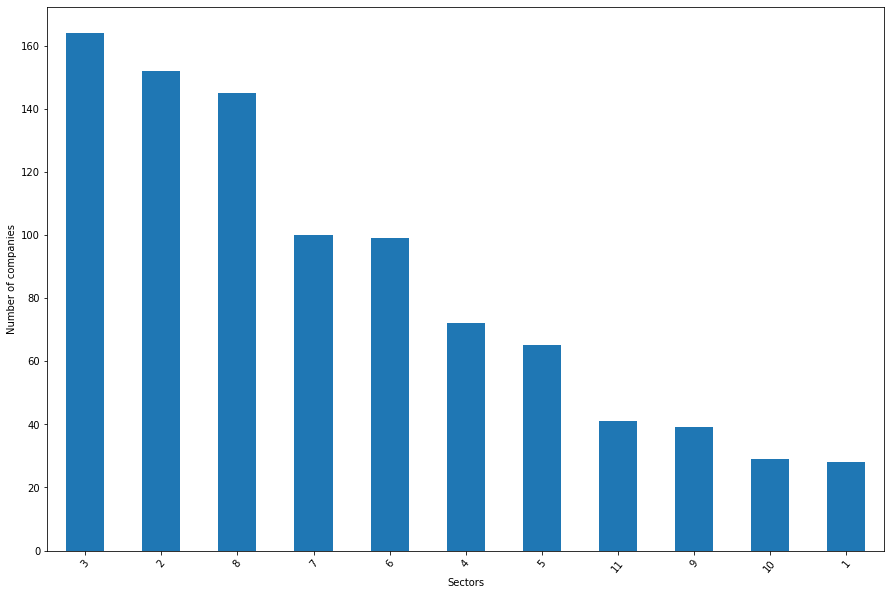

In [337]:
from matplotlib import pyplot as plt
sec_no= new_companies_data.groupby('sec_no')['tkr'].nunique()
plt.figure(figsize=(15,10))
sec_no.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Sectors")
plt.ylabel("Number of companies")
plt.show()

## **Kurtosis**

In [338]:
# new_companies_data.drop(['date', 'firm_name','tkr','sec_no' ], axis=1, inplace=True)

In [339]:
new_companies_data['px'] = new_companies_data['px'] .astype(float)
new_companies_data.dtypes

firm_no           int64
firm_name        object
tkr              object
sec_no            int64
year            float64
esg             float64
e               float64
s               float64
g               float64
es              float64
eg              float64
sg              float64
esg_cubic       float64
px              float64
fcf             float64
pe              float64
beta_5y         float64
beta_6m         float64
roa             float64
vol_180d        float64
mv              float64
vol_90d         float64
ret_ln          float64
ep              float64
ep_sec_mean     float64
ep_sec_sd       float64
ep_z            float64
sp              float64
sp_sec_mean     float64
sp_sec_sd       float64
sp_z            float64
cfp             float64
cfp_sec_mean    float64
cfp_sec_sd      float64
cfp_z           float64
value           float64
roa_sec_mean    float64
roa_sec_sd      float64
roa_z           float64
esg_value       float64
dtype: object

In [340]:
# kurtosis(new_companies_data, fisher = True)

In [341]:
kurt = pd.DataFrame(new_companies_data.kurtosis())
kurt = kurt.reset_index()
kurt = kurt.rename({0:"kurtosis", "index": "variable"}, axis=1)
kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]
kurt

C:\Users\heihe\AppData\Local\Temp/ipykernel_33208/2506432064.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = pd.DataFrame(new_companies_data.kurtosis())
C:\Users\heihe\AppData\Local\Temp/ipykernel_33208/2506432064.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]


,variable,kurtosis
0,firm_no,-1.200609
1,sec_no,-1.039748
2,year,-1.291738
3,esg,-0.336605
4,e,-0.628179
5,s,0.132501
6,g,-0.840830
7,es,3.017738
8,eg,1.296506
9,sg,2.499421


In [342]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
kurt.to_excel(writer, sheet_name='kurtosis', index=False)
writer.close()